# Eigenface Gesichtserkennung
* Autor: Prof. Dr. Johannes Maucher
* Datum: 27.11.2015

[Übersicht Versuche im Data Mining Praktikum](http://maucher.pages.mi.hdm-stuttgart.de/ai/page/dm/)

# Einführung
## Lernziele:

In diesem Versuch sollen Kenntnisse in folgenden Themen vermittelt werden:

* __Gesichtserkennung:__ mit der Eigenface Methode. 
* __Principal Component Analysis__
* __Bildverarbeitung__ mit Python.

Sämtliche Verfahren und Algorithmen werden in Python implementiert.

## Theorie zur Vorbereitung

Die Gesichtserkennung kann mit unterschiedlichen Ansätzen realisiert werden. In diesem Versuch wird ausschließlich der *Eigenface*-Ansatz vorgestellt. Dieser Ansatz basiert auf der *Principal Component Analysis (PCA)* und wurde erstmals in [M. Turk, A. Pentland; Eigenfaces for Recognition](http://www.cs.ucsb.edu/%7Emturk/Papers/jcn.pdf) vorgestellt. Die Eigenface-Methode weist eine gute Performance im Fall biometrisch aufgenommener Gesichtsbilder auf.

### Das Prinzip der Eigenface Gesichtserkennung

Bilder mit $C$ Pixeln in der Breite und $R$ Pixeln in der Höhe können als $R \times C$ Matrizen abgespeichert werden. Handelt es sich um ein Schwarz-Weiß- oder Graustufen-Bild, dann wird pro Bild nur eine derartige Matrix benötigt. Der Eintrag in der i.ten Zeile und j.ten Spalte dieser Matrix definiert den Grauwert des entsprechenden Pixels. In Farbbildern werden je nach benutztem Farbraum mehrere  Matrizen pro Bild benötigt, wobei jede Matrix einen Farbkanal des Bildes repräsentiert. Für ein RGB-Bild werden z.B. 3 Matrizen für die Farbkanäle Rot, Grün und Blau benötigt. 

Im Folgenden wird von quadratischen Graubildern mit $N \times N$ Pixeln ausgegangen. Wird jedes Pixel als ein Merkmal betrachtet, dann existieren insgesamt $N^2$ Merkmale, das Bild kann auch als ein Punkt im $N^2$-dimensionalen Raum betrachtet werden. Bilder der Auflösung $256 \times 256$ müßten also im $65536$-dimensionalen Raum beschrieben werden. Entsprechend komplex wäre die notwendige Verarbeitung. Ist jedoch bekannt, dass in einer Menge von Bildern jeweils ein gleichartiges Objekt abgebildet ist, z.B. wenn alle Bilder ausschließlich je ein Gesicht enthalten, dann existieren große Abhängigkeiten zwischen diesen Bildern. Geometrisch ausgedrückt bedeutet dies, dass die Punkte, welche die Menge der gleichartigen Bilder beschreiben, nicht gleichmäßig über den $N^2$-dimensionalen Raum verteilt sind, sondern in einen relativ kleinen Unterraum mit $K<<N^2$ Dimensionen nahezu vollständig beschrieben werden können. Jede dieser $K$ Dimensionen beschreibt ein für die Kategorie (z.B. Gesichtsbilder) relevantes Merkmal. Im Fall der Gesichtserkennung werden die relevanten Merkmale auch als Eigenfaces bezeichnet. Jedes Eigenface kann als Bild dargestellt werden, welches ein bestimmtes Gesichtsmerkmal besonders hervorhebt. Jedes individuelle Bild der Kategorie (d.h. jedes Gesicht) kann dann als Linearkombination der $K$ relevanten Merkmale (der $K$ Eigenfaces) beschrieben werden.

Das Problem besteht nun zunächst darin, aus einer Menge von Bildern der gleichen Kategorie die relevanten Merkmale zu finden. Dieses Problem wird durch die Principal Component Analysis (PCA) gelöst. Die PCA, findet in einer Menge von Bildern der gleichen Kategorie die Hauptachsen, also die Richtungen im $N^2$-dimensionalen Raum, entlang derer die Varianz zwischen den gegebenen Bildern am stärksten ist. Der $N^2$-dimensionale Pixelraum wird dann in einen Raum, der durch die gefundenen Hauptachsen aufgespannt wird, transformiert. In diesem in der Anzahl der Dimensionen stark reduzierten Raum wird dann die Bilderkennung durchgeführt. Der hier skizzierte Ansatz der Eigenfaces für die Gesichtserkennung wurde erstmalig in [M. Turk, A. Pentland; Eigenfaces for Recognition](http://www.cs.ucsb.edu/%7Emturk/Papers/jcn.pdf) beschrieben.

### Genereller Ablauf

Die Gesichtserkennung besteht aus 2 Phasen. In der Trainingsphase werden die Gesichtsbilder der zu erkennenden Personen eingelesen und für diese mit der PCA der Eigenface-Raum berechnet. In der Erkennungsphase wird ein neu aufgenommenes Bild in den Eigenface-Raum transformiert und dort dem naheliegendsten Bild aus der Trainingsmenge zugeordnet.

#### Trainingsphase

1. Lese Gesichtsbilder der Personen, die erkannt werden sollen ein. Die Menge dieser Bilder definiert das Trainingsset.
2. Berechne mit der PCA den Eigenface-Raum. Dabei werden nur die K Dimensionen, welche zu den Eigenvektoren mit den größten Eigenwerten gehören ausgewählt. Die zu den K Dimensionen (Eigenvektoren) gehörenden Bilder sind die Eigenfaces.
3. Transformiere jedes Bild der Trainingsmenge in den Eigenface-Raum und erhalte so die entsprechende Repräsentation des Bildes als Punkt im Eigenface-Raum.

#### Erkennungsphase

1. Transformiere das zu erkennende Bild in den Eigenface-Raum und berechne dort die Koordinaten des Bildes hinsichtlich aller K-Dimensionen (Eigenfaces).
2. Bestimme ob das zu erkennende Bild überhaupt ein Gesicht darstellt.
3. Bestimme ob das Gesicht zu einer bekannten Person, deren Bild in der Trainingsmenge enthalten ist, gehört.

#### Update (optional)

Füge das erkannte Bild zur Menge der Trainingsbilder hinzu und führe die Schritte der Trainingsphase durch.

### Bestimmung der Eigenfaces
<a id='theoryEig'></a>
Es werden zunächst $M$ Gesichtsbilder der zu erkennenden Personen eingelesen (von jeder zu erkennenden Personen möglichst mehrere Bilder). Es wird davon ausgegangen, dass jedes der Bilder $C$ Pixel breit und $R$ Pixel hoch ist. Das Bild kann dann als $R \times C$ Matrix dargestellt werden. Im Fall eines Graustufenbildes repräsentieren die Pixelwerte den entsprechenden Grauwert. Nach dem Einlesen werden die Bildmatrizen als eindimensionale Vektoren dargestellt. Für diese Umformung werden die Zeilen jeder Matrix von oben nach unten ausgelesen und hintereinander gereiht. Jedes Bild wird dann durch einen Vektor der Länge $Z=R \cdot C$ repräsentiert und kann als Punkt im Z-dimensionalen Raum dargestellt werden. Die $M$ Bildvektoren werden im folgenden mit $$\Gamma _1, \Gamma_2, \ldots, \Gamma_M$$ bezeichnet.

Im nächsten Schritt wird das Durchschnittsbild berechnet
$$
\overline{\Gamma}=\frac{1}{M}\sum_{i=1}^{M}{\Gamma_{i}}
$$

Dieses Durchschnittsbild wird von allen Bildern $\Gamma_i$ abgezogen. Die Menge der so gewonnenen Bildrepräsentationen
$$
\Phi_i=\Gamma_i - \overline{\Gamma}
$$

ist dann mittelwertsfrei. Die Menge  $\Phi_1, \Phi_2, \ldots, \Phi_M$ wird dann einer Principal Component Analysis (PCA) (siehe auch [J. Maucher; Feature Selection and Extraction](https://maucher.home.hdm-stuttgart.de/mlbook/html/Lecture/12FeatureSelection.html#principal-component-analysis-pca-and-linear-discriminant-analysis-lda)) unterzogen. Hierzu werden die mittelwertfreien Bildrepräsentationen $\Phi_i$ in die Spalten einer Matrix geschrieben. Diese Matrix wird im Folgenden mit $X$ bezeichnet. Unter der Annahme, dass die $\Phi_i$ bereits als Spaltenvektoren vorliegen, ist die Matrix $X$ definiert als:

$$
X=\left[ \Phi_1, \Phi_2, \ldots, \Phi_M \right].
$$

Die entsprechende Kovarianzmatrix ist dann
$$
CV=X \cdot X^T.
$$

Für die PCA müssten als nächstes eigentlich die Eigenvektoren und Eigenwerte der Kovarianzmatrix $CV$ berechnet werden. Für den vorliegenden Fall kann allerdings die hierfür notwendige Berechnung aus Komplexitätsgründen nicht realisiert werden. Man beachte dass die Matrix $CV$  $Z$ Spalten und $Z$ Zeilen enthält ($Z$ ist die Anzahl der Pixel in einem Bild) und für diese $Z$ Eigenvektoren und Eigenwerte existieren. Wie in [M. Turk, A. Pentland; Eigenfaces for Recognition](http://www.cs.ucsb.edu/%7Emturk/Papers/jcn.pdf) beschrieben, existieren im Fall, dass die Anzahl der Bilder $M$ wesentlich kleiner als die Anzahl der Pixel $Z$ ist, nur $M-1$ __relevante Eigenvektoren__, die Eigenwerte aller anderen Eigenvektoren liegen nahe bei Null. Der in [M. Turk, A. Pentland; Eigenfaces for Recognition](http://www.cs.ucsb.edu/%7Emturk/Papers/jcn.pdf) beschriebene Ansatz geht nun von der $M \times M$ Matrix

$$
X^T \cdot X
$$

aus, für welche die Eigenvektoren und Eigenwerte für eine moderate Bildanzahl $M$ gut berechnet werden können. Per Definition gilt für die Eigenvektoren $\mathbf{v}_i$ und Eigenwerte $\mu_i$ dieser Matrix:

$$
X^T \cdot X \cdot \mathbf{v}_i = \mu_i \mathbf{v}_i .
$$

Werden beide Seiten dieser Matrix linksseitig mit der Matrix $X$ multipliziert,

$$
X \cdot X^T \cdot X \cdot \mathbf{v}_i = \mu_i X \mathbf{v}_i,
$$
dann ist daraus zu erkennen, dass die $M$ Vektoren
$$
\mathbf{u}_i=X \mathbf{v}_i
$$

die Eigenvektoren der Matrix $$CV=X \cdot X^T$$ sind. D.h. es können zunächst die $M$ Eigenvektoren der relativ kleinen Matrix $X^T \cdot X$ bestimmt und aus diesen durch eine einfache Multiplikation mit der Matrix $X$ die relevanten Eigenvektoren der Matrix $CV$ berechnet werden. Da die Matrix $X$ die $M$ Bildrepräsentationen  $\Phi_i$ als Spalten enthält, können die gesuchten Eigenvektoren auch als Linearkombination der $M$ Bilder der Trainingsmenge beschrieben werden:

$$
\mathbf{u}_i=\sum_{k=1}^{M}{v_{i,k}\Phi_k}
$$

wobei mit $v_{i,k}$ die $k.$te Komponente des Vektors $\mathbf{v}_i$ bezeichnet wird. Die Eigenvektoren $\mathbf{u}_i$ werden auch Eigenfaces genannt. Per Definition sind die Eigenvektoren paarweise orthogonal. Jeder Eigenvektor ist ein Spaltenvektor mit $Z$ (=Anzahl der Pixel) Komponenten.

Die $M$ Eigenvektoren werden dann entsprechend der Größe der zugehörigen Eigenwerte $\mu_i$ geordnet. Für die weiteren Schritte kann zum Zwecke einer weiteren Komplexitätsreduktion eine Untermenge der $K$ relevantesten Eigenvektoren benutzt werden (also der $K$ Eigenvektoren mit den höchsten Eigenwerten). Beispielsweise ist in [M. Turk, A. Pentland; Eigenfaces for Recognition](http://www.cs.ucsb.edu/%7Emturk/Papers/jcn.pdf) für die Erkennung von $M=16$ Personen und eine Auflösung von $256 \times 256$ Pixel meist $K=7$ Eigenvektoren für eine gute Erkennung ausreichend.

### Gesichtserkennung im Eigenspace
<a id='theoryRec'></a>

Die $K$ ausgewählten Eigenvektoren $\mathbf{u}_1,\mathbf{u}_2,\ldots \mathbf{u}_K$ spannen einen $K-$dimensionalen Raum, den sogenannten Eigenspace auf. Die $K$ Vektoren repräsentieren die $K$ Merkmale hinsichtlich derer die Bilder der Trainingsdatenmenge am stärksten variieren.

Für die Bilderkennung wird jetzt jedes Bild, also sowohl die Bilder aus der Trainingsmenge als auch die zu erkennenden Bilder, in den Eigenspace transformiert. Jedes Bild stellt einen Punkt im Eigenspace dar. Für die Erkennung kann einfach die Distanz des zu erkennenden Bildes zu allen Bildern der Trainingsmenge berechnet werden. Das zu erkennende Bild wird der Person (Bildklasse) zugeordnet, deren Punkt im Eigenspace dem Punkt des zu erkennenden Bildes am nächsten liegt.

Die $K$ Komponenten eines Trainingsbildes werden berechnet, indem das Bild auf den jeweiligen Eigenvektor projiziert wird. Demnach ist die $k.$te Komponente des $i.$ten Trainingsbildes  $\Phi_i$:
$$
\omega_{k,i}=\mathbf{u}_k^T \Phi_i
$$

Der dem Bild $\Phi_i$ entsprechende Punkt im Eigenspace ist dann
$$
\mathbf{w}_i=[\omega_{1,i},\omega_{2,i},\ldots,\omega_{K,i}]. 
$$

Wird mit $\Gamma$ das zu erkennende Bild und mit $\Phi=\Gamma - \overline{\Gamma}$ die um den Mittelwert der Trainingsbilder subtrahierte Version des Bildes bezeichnet, dann sind
$$
\omega_{k}=\mathbf{u}_k^T \Phi
$$

die Koordinaten der Projektion von $\Phi$ in den Eigenspace und der dieses Bild repräsentierende Punkt
$$
\mathbf{w}=[\omega_{1},\omega_{2},\ldots,\omega_{K}].
$$

Das zu erkennende Bild wird dann dem Trainingsbild $\Phi_j$ zugeordnet, für welches gilt:
$$
j=argmin_{i} \left\{ d(\mathbf{w},\mathbf{w}_i) \right\}
$$

wobei mit $d(\mathbf{w},\mathbf{w}_i)$ die euklidische Distanz zwischen den Projektionen von $\Phi$ und $\Phi_i$ bezeichnet wird.

__Optional:__ Falls $\Phi_i$ nicht das einzige Bild einer Person in der Trainingsmenge ist, sondern für die entsprechende Person mehrere Trainingsbilder vorliegen, wird in der Distanzberechnung nicht $\Phi_i$, sondern der Mittelwert über alle zu dieser Person gehörenden Bilder eingesetzt:

$$
\overline{\Phi}=\frac{1}{|W|}\sum_{w \in W}^{}{\Phi_w} .
$$

Dabei bezeichnet $W$ die Menge aller der Indizes $w$, für die die $\Phi_w$ zur gleichen Person gehören. Im Praktikumsversuch muss diese Option nicht implementiert werden. Die im folgenden Abschnitt beschriebene Versuchsdurchführung bezieht sich auf den Fall, dass nur die Distanz zu Einzelbildern berechnet wird und das nächstliegende Bild ausgegeben wird.

Für die Mindestdistanz
$$
\epsilon =\min_{i} \left\{ d(\Phi,\Phi_i) \right\}
$$

wird in der Regel eine Schwelle $T$ definiert. Wenn $\epsilon > T$ ist, also eine relativ große Distanz zwischen dem zu erkennenden Bild und dem nächstliegenden Bild aus der Trainingsmenge besteht, wird davon ausgegangen, dass es sich um ein unbekanntes Gesicht handelt. Optional könnte dieses unbekannte Gesicht in die Trainingsmenge aufgenommen werden.

Schließlich muss noch der Fall behandelt werden, dass das eingelesene Bild kein Gesicht darstellt. Aufgrund der starken Projektion vom ursprünglichen Bildraum in den Eigenspace kann dieser Fall nicht durch eine Schwelle auf den Fehler $\epsilon$ erkannt werden. Es kann durchaus sein, dass ein Nicht-Gesichtsbild in die Umgebung eines Gesichtsbild im Eigenspace projiziert wird. Ein Nicht-Gesichtsbild wird aber eine relativ große Distanz $d(\Phi,\Phi_f)$ zwischen

$$
\Phi=\Gamma - \overline{\Gamma}
$$
und der Repräsentation im Eigenspace
$$
\Phi_f=\sum_{k=1}^{K}{\omega_k}\mathbf{u}_k
$$
aufweisen. Durch die Definition einer weiteren Schwelle $S$ auf $d(\Phi,\Phi_f)$ kann also erkannt werden, ob es sich überhaupt um ein Gesicht handelt. Im Versuch ist davon auszugehen, dass nur Gesichtsbilder verwendet werden, d.h. es muss nur der Test gegen die Schwelle $\epsilon$ implementiert werden.


 ## Vor dem Versuch zu klärende Fragen
 
 * Was sind Eigenvektoren und Eigenwerte?

Ein Eigenvektor ist ein Vektor der bei einer Transformation des Raumes nur gestaucht oder gestreckt wird aber niemals seine Richtung ändert. Der Eigenwert gibt an um wie viel der Eigenvektor gestreckt bzw. gestaucht wird. Wird ein Eigenvektor mit einer Transformationsmatrix multipliziert ist dies gleich der Multiplikation des Eigenvektors mit dem Eigenwert.

* Was versteht man unter Eigenfaces?

Eigenfaces ist eine andere Bezeichnung für die Eigenvektoren.

* Die PCA ist u.a. im entsprechenden Kapitel des Dokuments [J. Maucher; Feature Selection and Extraction](https://maucher.home.hdm-stuttgart.de/mlbook/html/Lecture/12FeatureSelection.html#principal-component-analysis-pca-and-linear-discriminant-analysis-lda) beschrieben. Wie kann mit der PCA eine Dimensionalitätsreduktion durchgeführt werden?

Bei der PCA werden für die Covarianz Matrix der gegebenen Daten die Eigenwerte und Eigenvektoren berechnet. Diese werden benötigt, um die PC's (Principal components/Hauptkomponenten) der Daten herauszufinden. Die erste PC ist die Gerade, die die Datenpunkte am besten annähert bzw. die Gerade bei der die größtmögliche Varianz der Daten herauskommt. Die weiteren PC's werden so berechnet, dass sie durch den Mittelwert der Daten gehen und orthogonal zu den anderen PC's stehen.  

Da wir aber die Eigenwerte und Eigenvektoren berechnet haben, können wir uns den gerade beschriebenen Prozess sparen, da die Eigenvektoren die Richtung der PC's angeben und die Eigenwerte die Informationsdichte (Größe der Varianz der Daten) dieses PC's wiedergeben. Somit können wir die Eigenvektoren nach ihren Eigenwerten sortieren und der Eigenvektor mit dem höchsten Eigenwert ist die erste PC.  

Für $N$ dimensionale Daten würden wir aber $N$ PC's erhalten. Um die Dimensionen zu reduzieren versucht PCA in der erste PC so viel Information wie möglich unterzubringen. Die Informationsdichte nimmt mit den weitern PC's immer weiter ab. Wie oben schon beschrieben. Dadurch können PC's weggelassen werden, die eine sehr geringe Informationsdichte besitzen und somit werden auch die Dimensionen reduziert.

* Wie werden mit dem Python Modul *Image* Bilder in ein Python-Programm geladen?

Im Falle eines Graustufenbildes wird das Bild in einem 2 dimensionalen Array abgespeichert, in dem der Grauwert mit einem Wert zwischen 0-255 dargestellt wird. Bei einem RGB Bild wird ein mehrdimensionales Array verwendet da für die 3 Kanäle ein eigenes Array mit 3 Einträgen verwendet werden muss.

# Versuchsdurchführung

## Einlesen der Gesichtsbilder in Numpy Arrays
Laden Sie die _Gesichtsbilder_ von [Nextcloud](https://cloud.mi.hdm-stuttgart.de/s/oAFWMPbq7ySYijS) herunter. Darin enthalten sind

* das Unterverzeichnis *training*, welches je 3 Bilder jedes Studenten enthält,
* das Unterverzeichnis *test*, welches die nicht in *training* enthaltenen Bilder enthält. Ein Bild von jedem Studenten.

Mit der unten gegebenen Funktion `parseDirectory(directoryName,extension)` wird eine Liste aller Dateinamen des Typs _extension_ im Verzeichnis _directoryName_ angelegt.

__Aufgabe:__

1. Legen Sie mit dieser Funktion eine Liste mit allen Dateinamen des Typs `extension='.png'` im Verzeichnis _training_ (enthält die Trainingsbilder) an.
2. Implementieren Sie eine Funktion `readImageToNumpyData(imageList)`, der eine Liste aller Dateinamen der Trainingsbilder übergeben wird. Die Funktion gibt ein Numpy-Array zurück. Jede Zeile dieses Arrays enthält ein *.png*-Bild in serialisierter Form. Hierzu ist jedes einzelne Bild zunächst mit der Funktion `matplotlib.image.imread(filename)` in ein zweidimensionales Numpy Array _img_ zu lesen. Durch den Aufruf von `img.shape=(1,-1)` wird das zweidimensionale Numpy Array zu einem eindimensionalen Array serialisiert. Dasselbe kann auch durch `img=img.reshape((1,-1))` erreicht werden. Danach muss eine Normierung aller Werte in den Bereich zwischen 0 und 1 durchgeführt werden. Hierzu müssen alle Pixelwerte eines Bildes durch den im jeweiligen Bild vorkommenden Maximalwert geteilt werden.  

In [1]:
%matplotlib inline
from os.path import isdir,join,normpath
from os import listdir,getcwd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as mplimg
from sklearn.preprocessing import MinMaxScaler

In [2]:
def parseDirectory(directoryName,extension):
    '''
    This method returns a list of all filenames in the Directory directoryName. 
    For each file the complete absolute path is given in a normalized manner (with 
    double backslashes). Moreover only files with the specified extension are returned in 
    the list.
    '''
    if not isdir(directoryName): return
    imagefilenameslist=sorted([
        normpath(join(directoryName, fname))
        for fname in listdir(directoryName)
        if fname.lower().endswith('.'+extension)            
        ])
    return imagefilenameslist

In [3]:
# Aufgabe 1 
extension='png'
path="FaceRecogBilder\\training"
name_list = parseDirectory(path,extension)

In [4]:
# Aufgabe 2
from sklearn import preprocessing

def readImageToNumpyData(name_list):
    np_image_list = []
    for image in name_list:
        np_image = mplimg.imread(image)
        np_image = np_image.reshape((1,-1))[0]
        maximum = np.max(np_image)
        np_image = np_image/maximum
        np_image_list.append(np_image)
    
    return np_image_list

## Berechnung des Durchschnittbildes

__Aufgaben:__

1. Die von der Funktion `convertImgListToNumpyData(imgList)` zurückgelieferte Matrix enthält in ihren Zeilen alle Trainingsbilder. Aus diesen Trainingsbildern ist nach der Gleichung für [$\overline{\Gamma}$](#theoryEig) das Durchschnittsbild zu berechnen, z.B. durch Anwendung der Numpy-Funktion _average_. Das Durchschnittsbild ist von allen Bildern abzuziehen (Gleichung [$\Phi_i$](#theoryEig)). Das daraus resultierende Numpy-Array enthält die mittelwertfreien Repräsentationen der Trainingsbilder und wird im Folgenden mit _NormedArrayOfFaces_ bezeichnet.

2. Zeigen Sie das Durchschnittsbild mithilfe der `matplotlib.pyplot.imshow()` an. Hierzu muss das eindimensionale Numpy Array, welches das Durchschnittsbild enthält, in ein zweidimensionales Array der ursprünglichen Bildgröße umgewandelt werden (Numpy Funktion `reshape()`)  

__Wichtiger Hinweis:__ Das Numpy-Array __NormedArrayOfFaces__ ist die Transpornierte $X^T$ der Matrix $X$ aus Gleichung [$X$](#theoryEig).

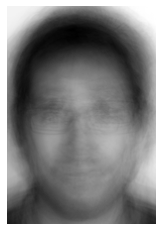

In [5]:
# Aufgabe 1
def convertImgListToNumpyData(imgList):
    normedArrayOfFaces = []
    average_img = np.average(imgList, axis=0)
    for image in imgList:
        image_mittelwertfrei = image-average_img
        normedArrayOfFaces.append(image_mittelwertfrei)
        #plt.imshow(image_mittelwertfrei.reshape(220,150), cmap='gray')
        #plt.show()
    return np.array(normedArrayOfFaces)

imgList = readImageToNumpyData(name_list)
NormedArrayOfFaces = convertImgListToNumpyData(imgList)

# Aufgabe 2
average_img = np.average(imgList, axis=0)
plt.imshow(average_img.reshape(220,150), cmap='gray')
plt.axis('off')
plt.show()

## Berechnung der Eigenfaces

__Aufgaben:__

1. Implementieren Sie die Funktion `calculateEigenfaces(adjfaces,width,height)`. Dieser Funktion werden die normierten Bilder _NormedArrayOfFaces_ zusammen mit der Bildbreite und -höhe übergeben. Zurück liefert die Funktion ein Numpy-Array, dessen Zeilen die berechneten normierten Eigenfaces sind. Die Berechnung der Eigenfaces ist im Theorieteil Abschnitt [Bestimmung der Eigenfaces](#theoryEig) beschrieben. Für die Python-Implementierung können Sie folgende Hinweise berücksichtigen:
    * Berechnung der transponierten eines Numpy-Arrays $A$ mit der Numpy-Methode `transpose()`
    * Matrixmultiplikation zweier Numpy-Arrays $A$ und $B$ mit der Numpy-Funktion `dot()`
    * Berechnung der Eigenvektoren und Eigenvalues eines Numpy Arrays $A$ mit der Numpy-Funktion `linalg.eigh()`
    * Sortierung von Numpy-Arrays mit den Numpy-Funktionen `sort()` und `argsort()`.
2. Aus dem von der Funktion `calculateEigenfaces(adjfaces,width,height)` zurück gelieferten Array von Eigenfaces sind die $K$ relevantesten auszuwählen. Dieses reduzierte Array wird im Folgenden mit _Usub_ bezeichnet. Im Versuch kann $K=6$ eingestellt werden.
3. Zeigen Sie die $K=6$ wichtigsten Eigenfaces als Bilder mit der `matplotlib.pyplot.imshow()` an.

In [6]:
# Aufgabe 1
def calculateEigenfaces(adjfaces,width,height):

    
    # 1 ------------------------------------------------
    X = adjfaces.T
    
    # 2 ------------------------------------------------
    XdotXT = X.T.dot(X)
    eigenX = np.linalg.eigh(XdotXT)
    wX = eigenX[0]
    vX = eigenX[1]
    
    # 3 ------------------------------------------------
    M = X.dot(vX)
    
    return M
    
eigenfaces = calculateEigenfaces(NormedArrayOfFaces, 220, 150)

In [7]:
# Aufgabe 2
K = np.flip(eigenfaces.T, axis=0)[:6]

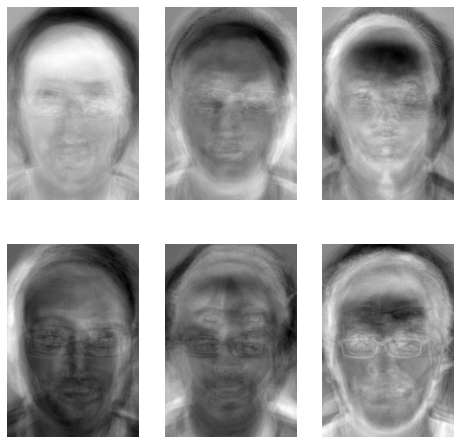

In [8]:
# Aufgabe 3
fig = plt.figure(figsize=(8, 8))
for i in range(0, 2*3):
    fig.add_subplot(2, 3, i+1)
    plt.imshow(K[i].reshape(220,150), cmap='gray')
    plt.axis('off')
plt.show()

## Transformation der normierten Trainingsbilder in den Eigenface Raum

__Aufgabe:__

Die im vorigen Schritt angelegten $K$ relevantesten Eigenfaces spannen den sogenannten _Eigenface-Raum_ auf. Für jedes der normierten Trainingsbilder, also für jede Zeile aus *NormedArrayOfFaces*, sind die Koordinaten im Eigenface-Raum entsprechend der Gleichung für [$\omega_{k,i}$](#theoryRec) definierten Transformation zu berechnen.

In [9]:
def eigenraum_transformation(K, img):
    w = []
    for eigen_face in K:
        komponente = eigen_face.dot(img)
        w.append(komponente)
    return w
    
    
w_NormedArrayOfFaces = []
count = 0
for trainings_bild in NormedArrayOfFaces:
    w = eigenraum_transformation(K, trainings_bild)
    w_NormedArrayOfFaces.append([trainings_bild, w, name_list[count]])
    count += 1
    
#display(w_NormedArrayOfFaces)

## Erkennung

__Aufgaben:__

1. Wählen Sie ein Bild aus dem Verzeichnis _test_ aus. Das ausgewählte zu erkennende Bild ist als Numpy-Array darzustellen. Eine Normierung der Pixelwerte in den Bereich zwischen 0 und 1 ist durchzuführen (wie bereits oben beschrieben). Schließlich muss auch von diesem Bild das Durchschnittsbild aller Trainingsbilder abgezogen werden. Diese Prozessschritte entsprechen der oben beschriebenen Vorverarbeitung der Trainingsbilder. Das resultierende normierte und mittelwertfreie Bild wird im Folgenden mit _NormedTestFace_ bezeichnet.
3. Danach sind die Koordinaten des _NormedTestFace_ im Eigenface-Raum nach Gleichung [$\omega_{k}$](#theoryRec) zu berechnen und das in diesem Raum nächstliegende Trainingsbild zu bestimmen.

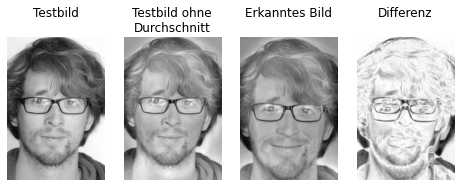

Gesuchte Person: 1
Gefundene Person: 1
Korrekt erkannt: True
Distanz: 841.1383666992188
------------------------------------------------------------


['1', '1', 841.1383666992188]

In [10]:
from scipy.spatial import distance
# Aufgabe 1 
path="FaceRecogBilder\\test"
test_name_list = parseDirectory(path,extension)
# normierung der bilder passiert bereits in readImageToNumpyData()
test_img = readImageToNumpyData(test_name_list)[0]

def find_person(test_img, searched_file, w_NormedArrayOfFaces, print_result = True):
    
    NormedTestFace = test_img - average_img

    # Aufgabe 2
    w_NormedTestFace = eigenraum_transformation(K, NormedTestFace)

    distances = []
    for w_normed in w_NormedArrayOfFaces:
        dis = distance.euclidean(w_NormedTestFace, w_normed[1])
        distances.append([dis, w_normed])

    found_img = sorted(distances)[0][1][0]
    
    
    searched_person = searched_file.split("\\")[-1].split("-")[0]
    found_person = sorted(distances)[0][1][2].split("\\")[-1].split("-")[0]
    distance_to_found = sorted(distances)[0][0]
    
    # Ausgabe der Erkannten Bilder
    if print_result:
        fig = plt.figure(figsize=(8, 8))
        ax1 = fig.add_subplot(1, 4, 1)
        ax1.title.set_text('Testbild\n')
        plt.axis('off')
        plt.imshow(test_img.reshape(220,150), cmap='gray')

        ax2 = fig.add_subplot(1, 4, 2)
        ax2.title.set_text('Testbild ohne\nDurchschnitt')
        plt.axis('off')
        plt.imshow(NormedTestFace.reshape(220,150), cmap='gray')

        ax3 = fig.add_subplot(1, 4, 3)
        ax3.title.set_text('Erkanntes Bild\n')
        plt.axis('off')
        plt.imshow(found_img.reshape(220,150), cmap='gray')

        ax4 = fig.add_subplot(1, 4, 4)
        ax4.title.set_text('Differenz\n')
        plt.axis('off')
        difference = -np.abs(found_img - NormedTestFace)
        plt.imshow((difference).reshape(220,150), cmap='gray')


        plt.show()
        print("Gesuchte Person:", searched_person)
        print("Gefundene Person:", found_person)
        print("Korrekt erkannt:", found_person==searched_person)

        print("Distanz:", distance_to_found)
        print(60*"-")
    
    
    return [searched_person, found_person, distance_to_found]

find_person(test_img, test_name_list[0], w_NormedArrayOfFaces)

##### Ergänzung zu dem vierten Bild

Das vierte Bild zeigt die Differenz zwischen dem Testbild und dem Erkannten Bild
Dieses Bild wird mit $-|Testbild - Erkanntes Bild|$ berechnet.   
Dadurch werden die Unterscheide beider Bilder hervorgehoben.
Dieses Bild wird zur besseren darstellung mit $-$ invertiert. 

__Aufgaben:__
1. Führen Sie die implementierte Gesichtserkennung für alle Bilder im Verzeichnis _test_ aus. Zeigen Sie jeweils das Testbild, das zugehörige erkannte Bild und die Distanz zwischen beiden Bildern an.
2. Bestimmen Sie für die Werte $K=5,K=10$ und $K=15$ ($K$ ist die Anzahl der verwendeten Eigenfaces) die Rate falsch erkannter Bilder. 

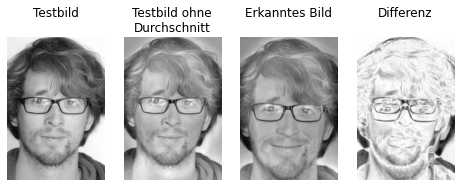

Gesuchte Person: 1
Gefundene Person: 1
Korrekt erkannt: True
Distanz: 841.1383666992188
------------------------------------------------------------


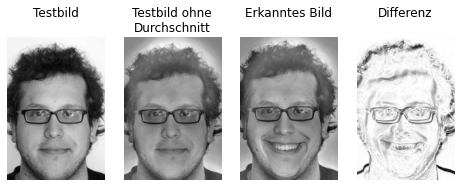

Gesuchte Person: 10
Gefundene Person: 10
Korrekt erkannt: True
Distanz: 1180.1011962890625
------------------------------------------------------------


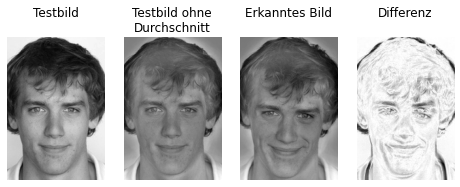

Gesuchte Person: 11
Gefundene Person: 11
Korrekt erkannt: True
Distanz: 531.775634765625
------------------------------------------------------------


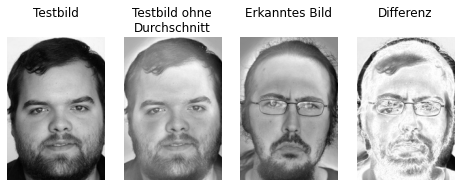

Gesuchte Person: 12
Gefundene Person: 5
Korrekt erkannt: False
Distanz: 1403.8414306640625
------------------------------------------------------------


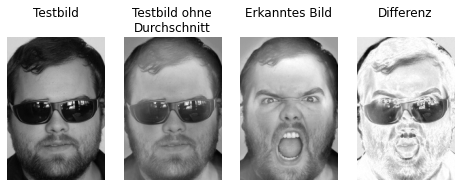

Gesuchte Person: 12
Gefundene Person: 12
Korrekt erkannt: True
Distanz: 1416.664306640625
------------------------------------------------------------


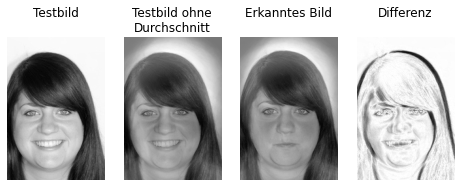

Gesuchte Person: 13
Gefundene Person: 13
Korrekt erkannt: True
Distanz: 719.64990234375
------------------------------------------------------------


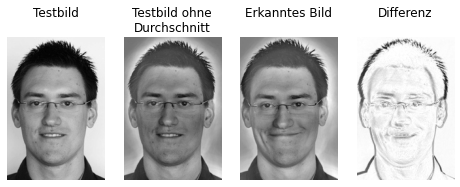

Gesuchte Person: 14
Gefundene Person: 14
Korrekt erkannt: True
Distanz: 1072.6142578125
------------------------------------------------------------


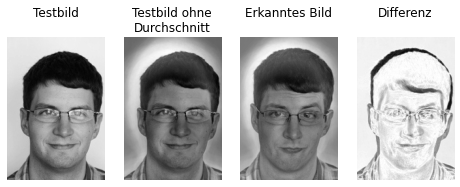

Gesuchte Person: 15
Gefundene Person: 15
Korrekt erkannt: True
Distanz: 1418.3431396484375
------------------------------------------------------------


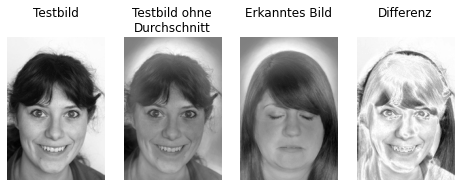

Gesuchte Person: 16
Gefundene Person: 13
Korrekt erkannt: False
Distanz: 1656.4925537109375
------------------------------------------------------------


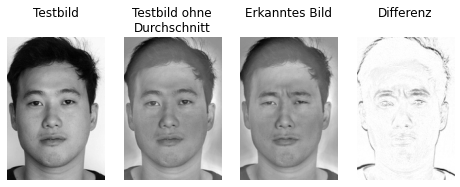

Gesuchte Person: 17
Gefundene Person: 17
Korrekt erkannt: True
Distanz: 350.358642578125
------------------------------------------------------------


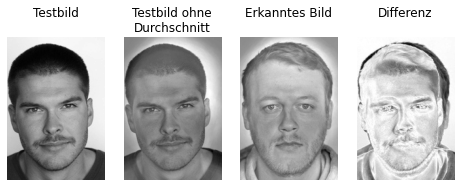

Gesuchte Person: 18
Gefundene Person: 4
Korrekt erkannt: False
Distanz: 1495.1246337890625
------------------------------------------------------------


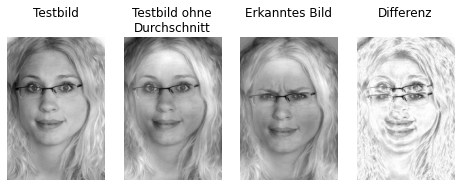

Gesuchte Person: 19
Gefundene Person: 19
Korrekt erkannt: True
Distanz: 289.6669921875
------------------------------------------------------------


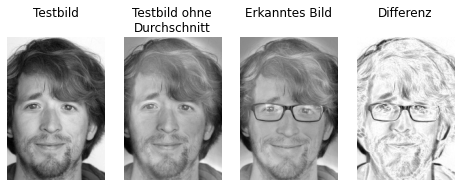

Gesuchte Person: 1b
Gefundene Person: 1
Korrekt erkannt: False
Distanz: 694.6690063476562
------------------------------------------------------------


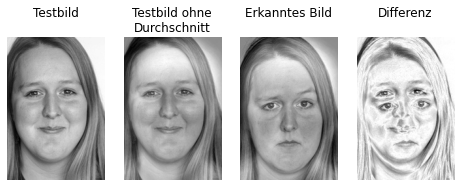

Gesuchte Person: 2
Gefundene Person: 2
Korrekt erkannt: True
Distanz: 752.9511108398438
------------------------------------------------------------


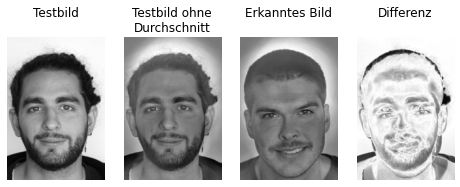

Gesuchte Person: 20
Gefundene Person: 18
Korrekt erkannt: False
Distanz: 940.0989990234375
------------------------------------------------------------


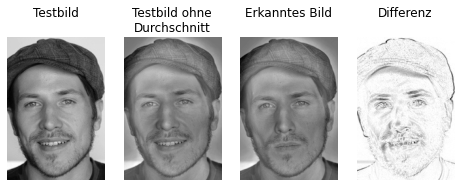

Gesuchte Person: 3
Gefundene Person: 3
Korrekt erkannt: True
Distanz: 247.8232421875
------------------------------------------------------------


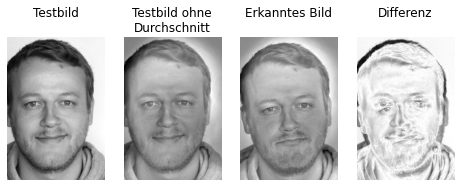

Gesuchte Person: 4
Gefundene Person: 4
Korrekt erkannt: True
Distanz: 1225.7677001953125
------------------------------------------------------------


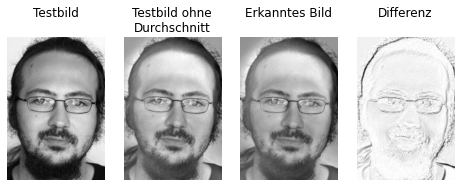

Gesuchte Person: 5
Gefundene Person: 5
Korrekt erkannt: True
Distanz: 495.4156494140625
------------------------------------------------------------


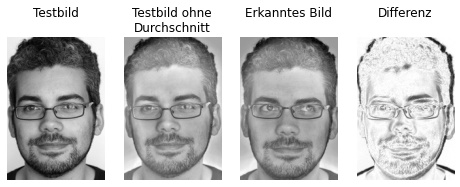

Gesuchte Person: 6
Gefundene Person: 6
Korrekt erkannt: True
Distanz: 1091.025390625
------------------------------------------------------------


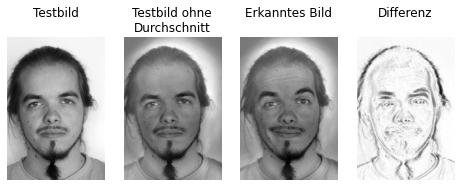

Gesuchte Person: 7
Gefundene Person: 7
Korrekt erkannt: True
Distanz: 741.3720703125
------------------------------------------------------------


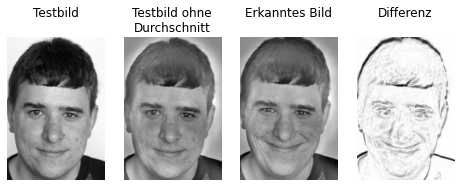

Gesuchte Person: 8
Gefundene Person: 8
Korrekt erkannt: True
Distanz: 1362.2369384765625
------------------------------------------------------------


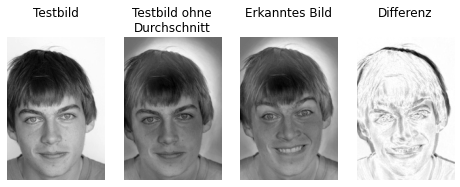

Gesuchte Person: 9
Gefundene Person: 9
Korrekt erkannt: True
Distanz: 737.4578247070312
------------------------------------------------------------


In [11]:
# Aufgabe 1
test_img_list = readImageToNumpyData(test_name_list)

results_k6 = []
count = 0
for img in test_img_list:
    result = find_person(img, test_name_list[count], w_NormedArrayOfFaces)
    results_k6.append(result)
    count += 1

##### Bonus zu Aufgabe 1: Erkennung von besonderen Bildern

Als Experiment haben wir die Testbilder so angepasst, dass eine Zuordnung nicht unbedingt möglich ist.
So haben wir zum Beispiel ein Bild von einem Löwen eingefügt, um zu sehen welcher Person dieser Löwe zugeordnet wird.
Der Löwe wurde einer Person die Viele Blonde Haare hat, zugeordnet, vermutlich weil die Löwenmähne auf dem Bild an einer ähnlichen Stelle ist.  
<img src="./loewe.png" align="center">  

Ein anderes Testbild haben wir gespiegelt. Diese Person hat auf ihren Trainingsbildern immer den Kopf nach links genneigt, durch die Spiegelung ist der Kopf aber nun nach rechts geneigt. Das Bild wurde so einem Bild einer anderen Person zugeordnet, die den Kopf ebenfalls nach rechts geneigt hat.  
<img src="./rechts.png" align="center">  

Bei einem anderen Testbild haben wir das gesicht mit einer gleichfarbigen Fläche ersetzt und es ist nur noch der Umriss des Kopfes zu sehen. Die richtige Person wurde dennoch erkannt, vermutlich weil die Haare bereits genug Informationsgehalt beinhalten.  
<img src="./noface.png" align="center">

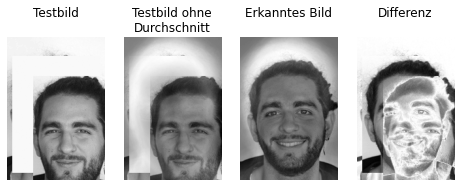

Gesuchte Person: 20c
Gefundene Person: 20
Korrekt erkannt: False
Distanz: 3072.905517578125
------------------------------------------------------------


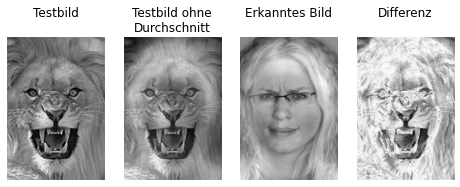

Gesuchte Person: loewe
Gefundene Person: 19
Korrekt erkannt: False
Distanz: 1501.446044921875
------------------------------------------------------------


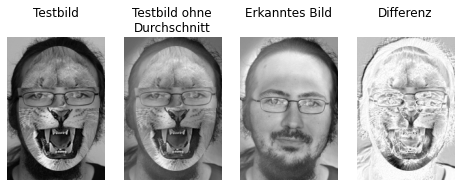

Gesuchte Person: loewe
Gefundene Person: 5
Korrekt erkannt: False
Distanz: 1281.475341796875
------------------------------------------------------------


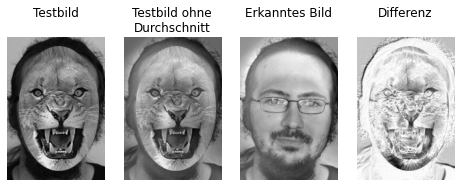

Gesuchte Person: loewe
Gefundene Person: 5
Korrekt erkannt: False
Distanz: 1317.33935546875
------------------------------------------------------------


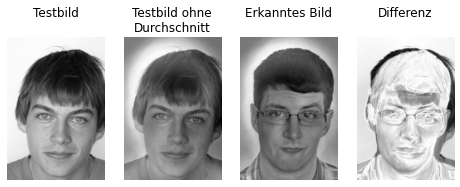

Gesuchte Person: mirror
Gefundene Person: 15
Korrekt erkannt: False
Distanz: 2441.0361328125
------------------------------------------------------------


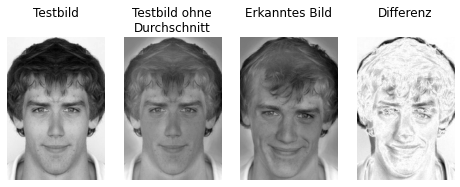

Gesuchte Person: mirror
Gefundene Person: 11
Korrekt erkannt: False
Distanz: 986.3030395507812
------------------------------------------------------------


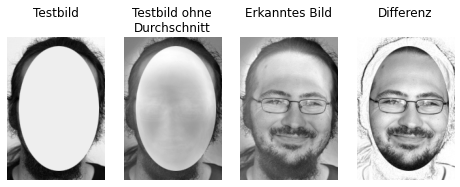

Gesuchte Person: noface
Gefundene Person: 5
Korrekt erkannt: False
Distanz: 2110.1298828125
------------------------------------------------------------


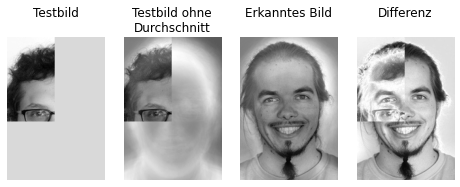

Gesuchte Person: noface
Gefundene Person: 7
Korrekt erkannt: False
Distanz: 1645.34423828125
------------------------------------------------------------


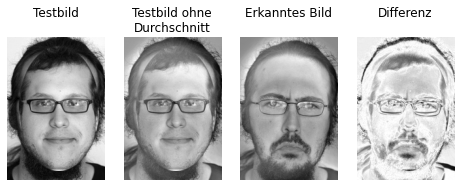

Gesuchte Person: twoface
Gefundene Person: 5
Korrekt erkannt: False
Distanz: 1140.3265380859375
------------------------------------------------------------


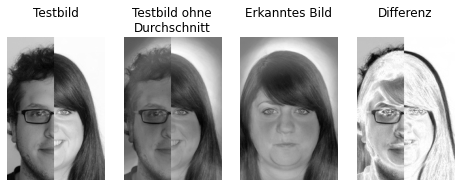

Gesuchte Person: twoface
Gefundene Person: 13
Korrekt erkannt: False
Distanz: 2491.302490234375
------------------------------------------------------------


In [12]:
# Bonus zu Aufgabe 1 - erkennung von besonderen gesichtern

path="FaceRecogBilder\\besondere_gesichter"
special_name_list = parseDirectory(path,extension)
special_img_list = readImageToNumpyData(special_name_list)

count = 0
for img in special_img_list:
    result = find_person(img, special_name_list[count], w_NormedArrayOfFaces)
    count += 1

Rate von korrekt erkannten Bildern bei 5 Eigenfaces: 0.7727272727272727
Rate von korrekt erkannten Bildern bei 6 Eigenfaces: 0.7727272727272727
Rate von korrekt erkannten Bildern bei 10 Eigenfaces: 0.8181818181818182
Rate von korrekt erkannten Bildern bei 15 Eigenfaces: 0.8636363636363636


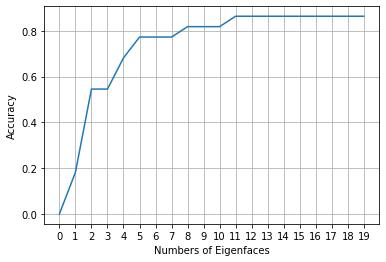

In [13]:
# Aufgabe 2
def detect_faces(print_result=False):
    w_NormedArrayOfFaces = []
    count = 0
    for trainings_bild in NormedArrayOfFaces:
        w = eigenraum_transformation(K, trainings_bild)
        w_NormedArrayOfFaces.append([trainings_bild, w, name_list[count]])
        count += 1

    results = []
    count = 0
    for img in test_img_list:
        result = find_person(img, test_name_list[count], w_NormedArrayOfFaces, print_result=print_result)
        results.append(result)
        count += 1
    return results

def get_rate_of_correct_detected_images(results):
    correct_guesses = 0
    for res in results:
        if res[0] == res[1]:
            correct_guesses += 1
    return correct_guesses/len(results)

accuracies = []
amount_of_k = []
# Hinzufügen von 0 Werten, damit der Zugriff über Indexoperator stimmt
accuracies.append(0)
amount_of_k.append(0)

for i in range(1,20):
    K = np.flip(eigenfaces.T, axis=0)[:i]
    result = detect_faces()
    accuracy = get_rate_of_correct_detected_images(result)
    accuracies.append(accuracy)
    amount_of_k.append(i)

plt.xlabel("Numbers of Eigenfaces")
plt.ylabel("Accuracy")
plt.grid()
plt.xticks(np.arange(0, 20))
plt.plot(amount_of_k, accuracies)



print("Rate von korrekt erkannten Bildern bei 5 Eigenfaces:", accuracies[5])
print("Rate von korrekt erkannten Bildern bei 6 Eigenfaces:", accuracies[6])
print("Rate von korrekt erkannten Bildern bei 10 Eigenfaces:", accuracies[10])
print("Rate von korrekt erkannten Bildern bei 15 Eigenfaces:", accuracies[15])

In diesem Plot haben wir Versucht die Optimale Anzahl von Eigenfaces mit den menschlichen
Trainingsdaten zu bestimmen. Hierzu berechnen wir die Accuracy bei steigender Eigenface-Anzahl.
Ab einer Anzahl von 5 Eigenface haben wir den stärksten Anstieg oberhalb der 50% Grenze auf ca. 77%, jedoch mit einem
leicht höherem Rechenaufwand von 11 Eigenfaces konvergiert die Funktion an die höchste
Accuracy von ca. 86%. Woraus sich schließen lässt, dass 11 Bilder innerhalb des Trainingssets
den größten Informationsgehalt des Trainingsset beinhalten, da jedes Eigenface sich auf ein
Bild zurückführen lässt, und zudem es sich bei dem Trainingsset nicht lohnt mehr als 11 Eigenfaces zu berechnen.

### Bonus: Erkennung von Tierbildern

Eigenfaces der Tiere


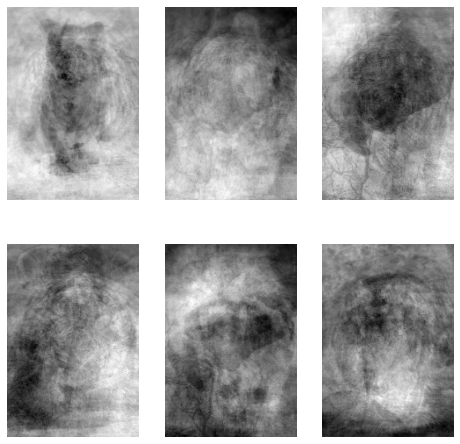

Erkennen der Tiere


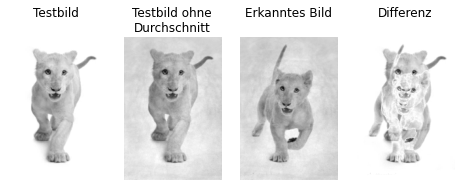

Gesuchte Person: babyloewe
Gefundene Person: babyloewe
Korrekt erkannt: True
Distanz: 400.7471923828125
------------------------------------------------------------


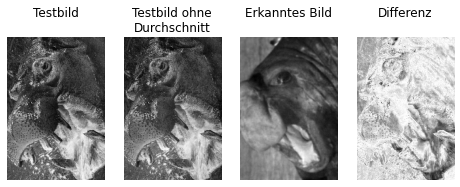

Gesuchte Person: hippo
Gefundene Person: seeelefant
Korrekt erkannt: False
Distanz: 1589.7740478515625
------------------------------------------------------------


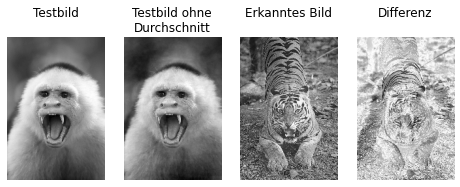

Gesuchte Person: kapuzina
Gefundene Person: tiger
Korrekt erkannt: False
Distanz: 1191.9580078125
------------------------------------------------------------


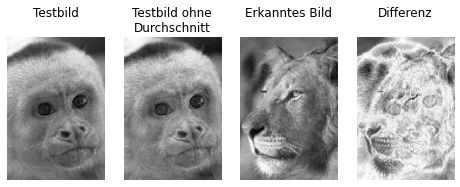

Gesuchte Person: kapuzina
Gefundene Person: loewe
Korrekt erkannt: False
Distanz: 1484.047119140625
------------------------------------------------------------


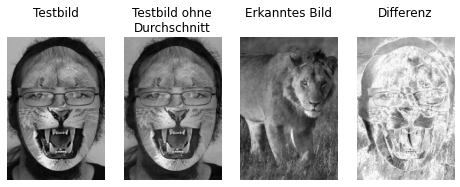

Gesuchte Person: loewe
Gefundene Person: loewe
Korrekt erkannt: True
Distanz: 1001.3821411132812
------------------------------------------------------------


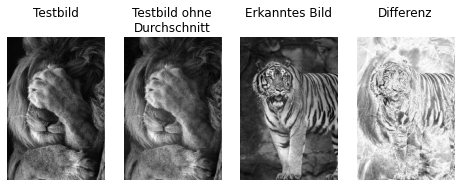

Gesuchte Person: loewe
Gefundene Person: tiger
Korrekt erkannt: False
Distanz: 1749.0145263671875
------------------------------------------------------------


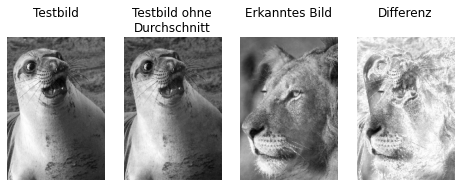

Gesuchte Person: robbe
Gefundene Person: loewe
Korrekt erkannt: False
Distanz: 1670.28759765625
------------------------------------------------------------


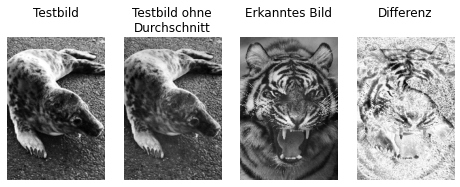

Gesuchte Person: robbe
Gefundene Person: tiger
Korrekt erkannt: False
Distanz: 787.2979736328125
------------------------------------------------------------


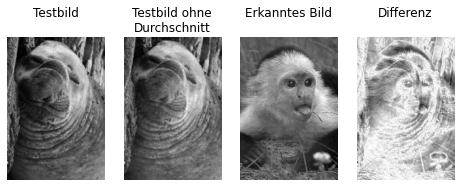

Gesuchte Person: seeelefant
Gefundene Person: kapuzina
Korrekt erkannt: False
Distanz: 1223.8450927734375
------------------------------------------------------------


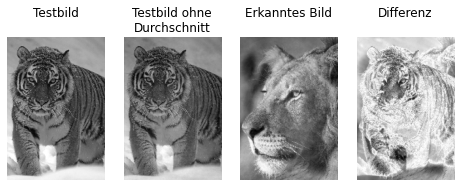

Gesuchte Person: tiger
Gefundene Person: loewe
Korrekt erkannt: False
Distanz: 1320.22998046875
------------------------------------------------------------


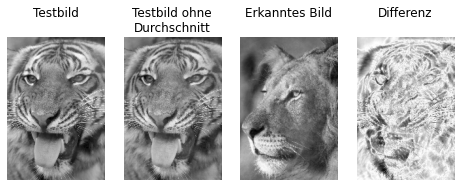

Gesuchte Person: tiger
Gefundene Person: loewe
Korrekt erkannt: False
Distanz: 945.8661499023438
------------------------------------------------------------


In [15]:
path="FaceRecogBilder\\animal_training"
name_list = parseDirectory(path,extension)
imgList = readImageToNumpyData(name_list)


NormedArrayOfFaces = convertImgListToNumpyData(imgList)

eigenfaces = calculateEigenfaces(NormedArrayOfFaces, 220, 150)

K = np.flip(eigenfaces.T, axis=0)[:6]

average_img = np.average(imgList, axis=0)

print("Eigenfaces der Tiere")
fig = plt.figure(figsize=(8, 8))
for i in range(0, 2*3):
    fig.add_subplot(2, 3, i+1)
    plt.imshow(K[i].reshape(220,150), cmap='gray')
    plt.axis('off')
plt.show()

print("Erkennen der Tiere")
path="FaceRecogBilder\\animal_test"
test_name_list = parseDirectory(path,extension)
test_img_list = readImageToNumpyData(test_name_list)
result = detect_faces(True) 

Der Datensatz an Tierbildern wurde von Hand ausgewählt in der
Google Bildersuche und dann mit photoresizer.com auf 150x220
Format gebracht. Anschließend wurden die Bilder mit Photoshop
auf Bildtiefe 8 angepasst, bzw. in Graubilder umgewandelt.

Die Ausgewählten Tiere sind Tiger, Löwe, Robbe, Seeelefant,
Hippo und Kapuzina Affe. Die Auswahl der Tiere wurde getroffen
anhand von Ähnlichkeiten in Haltung(Aufgerissenes Maul, liegend
oder Frontalansicht), Umgebungsfarben(Meer, Savannah, Schnee) und
Hautfarben bzw. Markante Merkmale.

Diese Ähnlichkeiten werden deutlich z.B. in den Bildern `kapuzina-7.png` und
`loewe-6.png`, durch das aufgerissene Maul und den Fangzähnen.
`robbe-6.png` und `seeelefant-6.png` ähneln sich über die Meeresumgebung, der Grauton
Hautfarbe und den Schwarzen Augen.
`loewe-3.png` und `tiger-5.png` stehen beide in einer Schneelandschaft, um zu schauen
ob eher der Löwe sich ähnelt mit dem Tiger oder ob die Bilder aufgrund
des Hintergrundes einander zugeordnet werden.

Ein Vermutung war hierbei, dass diese Art von Gesichtserkennung nur
schlecht funktioniert bei einem kleinen Datensatz und vielen
verschiedenen Umgebungen, Perspektiven und Tierarten. Zudem
hat die Gesichtserkennung nur deshalb so gut Funktioniert weil
dieselbe Person sowohl in Test und Training vorkommt. Was zunächst
Trivial klingt. Aber bei genauerer überlegung möchte man in manchen
Fällen nicht direkt ein Gesicht erkennen sondern viel mehr ein Konzept
wie Tiger, Baum oder Haus was aber durch die Vektorisierung in den
Eigenraum nur mit entsprechend großen Datenmengen geht oder Limitierung
der Dimensionen in der Sich das Bild verändern kann. Ein Bild kann
sich verändern durch Beleuchtung, Umgebung, Objekten, Haltung des
Modells usw.. Im Beispiel mit den Menschlichen Bildern kann man zumindest
sagen, dass durch die Einschränkung von Kopfhaltung, Anzahl verschiedener
Modelle und Fotoperspektive dem Ki Modell einiges an Varianz in den Bildern
entnommen wird. Wodurch es genauer eingrenzen kann wer/was auf dem Bild
zu erkennen ist.

Wenn man das Modell jedoch genauer Betrachtet vergleicht es Helligkeiten
von Pixeln miteinander, dh. wenn 2 völlig verschiedene Bilder an den 
Selben stellen die gleiche Graustufe haben werden sie als ähnlich eingestuft.
Unabhängig ob der Grauton durch eine Wand im Bild oder den Hautton einer
Robbe ensteht.

Bei der Erkennung von Konzepten kann dem Modell theoretisch nachgeholfen
werden in dem die Anzahl den Eigenvektoren erhöht wird, so dass jedes Konzept
mindestens einen Eigenvektor hat durch den es repräsentiert wird.

Angenommen man hat eine Datenmenge wie in unserem Beispiel mit verschiedenen Tieren,
dann könnte es passieren, dass die 6 Eigenvektoren mit den größten Eigenwerten
alles Eigenvektoren von Bilderen eines Löwen sind. Wodurch ein Kapuzina Affe
gar oder nur kaum im Vektorraum repräsentiert wird, es sei denn der Kapuzina sieht
einem Löwen sehr ähnlich oder man hat keine Minimum Distanz zur Erkennung im code.

Leider war unsere Datenmenge zu gering um Konzepte von Tieren zu erkennen, da
die Bilder zu viele Variablen beinhalten unteranderem auch, dass Train und Test
nicht die gleichen Modelle beinhalten. Man könnte die Erkennung deutlich verbessern,
in dem man im Zoo immer das Selbe Tier Fotografiert für das Konzept Löwe zum Beispiel
und für die Robbe immer die selbe Robbe Fotografiert.  
<img src="./babyloewe.png" align="left"><br><br><br>
Im Beispiel `babyloewe(1-5).png`, haben wir 5 Stockfotos vom gleichen Babylöwen verwendet mit ähnlicher
Beleuchtung, Haltung und Perspektive , wodurch dieser auch direkt nach dem Training
mit nur 4 Bildern erkannt wurde.  
Dies untermauert die Vermutung, dass das Modell der
Gesichtserkennung besser funktioniert wenn die Varianz der Bilder klein gehalten wird.
<br><br><br><br>
Ein anderer Ansatz wäre die Menge an Tierbildern von ca 50 Bildern auf über 1000 oder 10000 Bildern zu erhöhen.
Was interessant wäre aber den Rahmen sprengt, wärezu schauen ob dieses Ki Modell
an sich schon ungeeignet ist unbekannte Objekte / Konzepte zu erkennen.